Simulation of probabilities in a cube

In [1]:
import numpy as np

# Parameters
# dimensions = 2
dimensions = 10_000 
n_samples = 100000
epsilon = 0.001

# Generate samples uniformly in 2D unit square
samples = np.random.rand(n_samples, dimensions)

# Check if any coordinate is within epsilon of an edge (0 or 1)
is_near_edge = np.any((samples < epsilon) | (samples > 1 - epsilon), axis=1)

# Compute proportion
near_edge_ratio = np.mean(is_near_edge)
print(f"Proportion of points near edge: {near_edge_ratio:.4%}")

Proportion of points near edge: 100.0000%


In [2]:

# Function to compute statistics of distances between random point pairs
def distance_statistics(dim, n_pairs):
    a = np.random.rand(n_pairs, dim)
    b = np.random.rand(n_pairs, dim)
    distances = np.linalg.norm(a - b, axis=1)
    return {
        "dimension": dim,
        "mean": np.mean(distances),
        "min": np.min(distances),
        "max": np.max(distances),
        "relative_range": (np.max(distances) - np.min(distances)) / np.min(distances)
    }

# Adjusted sample sizes for feasibility
custom_sample_sizes = {
    3: 1000,
    1_000_000: 100
}

# Collect statistics
results = [distance_statistics(dim, n_pairs) for dim, n_pairs in custom_sample_sizes.items()]

# Display results
for stat in results:
    print(f"Dimension: {stat['dimension']}")
    print(f"  Mean distance:     {stat['mean']:.4f}")
    print(f"  Min distance:      {stat['min']:.4f}")
    print(f"  Max distance:      {stat['max']:.4f}")
    print(f"  Relative range:    {stat['relative_range']:.4f}")
    print()

Dimension: 3
  Mean distance:     0.6502
  Min distance:      0.0635
  Max distance:      1.3278
  Relative range:    19.9153

Dimension: 1000000
  Mean distance:     408.2331
  Min distance:      407.5853
  Max distance:      408.9151
  Relative range:    0.0033



In [3]:
from sklearn import datasets
digits= datasets.load_digits()

<Figure size 640x480 with 0 Axes>

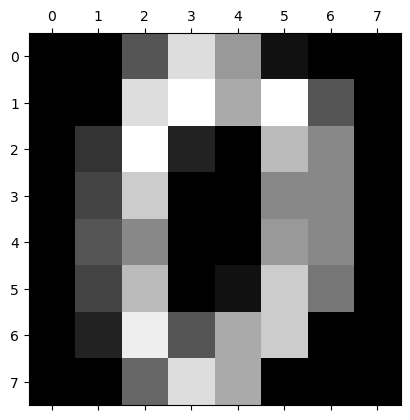

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()



In [5]:
digits.data.shape

(1797, 64)

Covarianz Matrix

In [6]:
import numpy as np

In [7]:
covar = np.matmul(np.transpose(digits.data),digits.data)

In [8]:
np.cov(digits.data)

array([[27.29265873,  6.79613095, 10.8531746 , ..., 17.3640873 ,
        22.63095238, 17.41666667],
       [ 6.79613095, 42.51165675, 27.7718254 , ..., 32.96676587,
        22.23214286, 22.06150794],
       [10.8531746 , 27.7718254 , 40.3015873 , ..., 31.66269841,
        19.26984127, 25.23809524],
       ...,
       [17.3640873 , 32.96676587, 31.66269841, ..., 46.13392857,
        27.28174603, 36.62301587],
       [22.63095238, 22.23214286, 19.26984127, ..., 27.28174603,
        39.15873016, 27.66666667],
       [17.41666667, 22.06150794, 25.23809524, ..., 36.62301587,
        27.66666667, 40.26984127]])

Basiswechselmatrix

In [9]:
digits_centered = digits.data - digits.data.mean(axis=0)
U, s, Vt = np.linalg.svd(digits_centered, full_matrices=True)

In [10]:
U.shape, s.shape, Vt.shape

((1797, 1797), (64,), (64, 64))

In [11]:
smat = np.zeros((1797,64))
smat[:64, :64] = np.diag(s)

In [12]:
np.allclose(digits_centered, U @ smat @Vt)

True

Projektion

In [13]:
s

array([5.67006567e+02, 5.42251854e+02, 5.04630594e+02, 4.26117676e+02,
       3.53335033e+02, 3.25820366e+02, 3.05261580e+02, 2.81160331e+02,
       2.69069782e+02, 2.57823951e+02, 2.26318797e+02, 2.21514832e+02,
       1.98330715e+02, 1.95700139e+02, 1.77976271e+02, 1.74460791e+02,
       1.68727876e+02, 1.64158492e+02, 1.48233309e+02, 1.39831325e+02,
       1.38584433e+02, 1.31188207e+02, 1.28726917e+02, 1.24931590e+02,
       1.22575034e+02, 1.13444877e+02, 1.11480271e+02, 1.05463488e+02,
       1.02807802e+02, 9.62285662e+01, 8.98129647e+01, 8.73349465e+01,
       8.52596044e+01, 8.41567134e+01, 8.15893653e+01, 7.96420046e+01,
       7.44304714e+01, 7.01219569e+01, 6.92755923e+01, 6.75640682e+01,
       6.40331590e+01, 5.85269779e+01, 5.71281856e+01, 5.50924318e+01,
       5.01790999e+01, 4.81749428e+01, 4.56228649e+01, 4.08958572e+01,
       3.46850352e+01, 2.95461187e+01, 2.12889966e+01, 1.33446026e+01,
       1.06481402e+01, 1.04443771e+01, 8.44041164e+00, 5.18181553e+00,
      

In [14]:
Vt.shape

(64, 64)

In [15]:
projection_matrix = Vt.T[:, :2]
projected_data = digits_centered @ projection_matrix

In [17]:
projected_data.shape

(1797, 2)

In [18]:
projected_data

array([[  1.25946645, -21.27488348],
       [ -7.9576113 ,  20.76869896],
       [ -6.99192297,   9.95598641],
       ...,
       [-10.8012837 ,   6.96025223],
       [  4.87210009, -12.42395362],
       [  0.34438963,  -6.36554919]])

In [19]:
digits_centered

array([[ 0.        , -0.30383973, -0.20478575, ..., -6.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  3.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  9.2359488 ,
         6.93210907, -0.36449638],
       ...,
       [ 0.        , -0.30383973, -4.20478575, ..., -0.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -3.20478575, ...,  5.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973,  4.79521425, ...,  5.2359488 ,
        -1.06789093, -0.36449638]])

Mit scikit learn

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(digits.data)

In [21]:
projected_data

array([[  1.25946645, -21.27488348],
       [ -7.9576113 ,  20.76869896],
       [ -6.99192297,   9.95598641],
       ...,
       [-10.8012837 ,   6.96025223],
       [  4.87210009, -12.42395362],
       [  0.34438963,  -6.36554919]])

In [22]:
X2D

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

Explained variance

In [23]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [24]:
pca = PCA(n_components=0.95)
digits_max_variance = pca.fit_transform(digits.data)
sum(pca.explained_variance_ratio_)

0.9547965245651596

In [25]:
digits_max_variance.shape

(1797, 29)

Rekonstruktion

In [26]:
digits_reconstructed = pca.inverse_transform(digits_max_variance)

<Figure size 640x480 with 0 Axes>

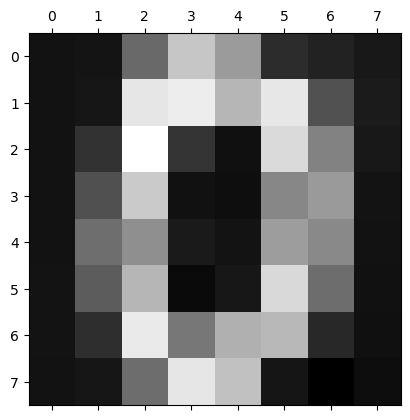

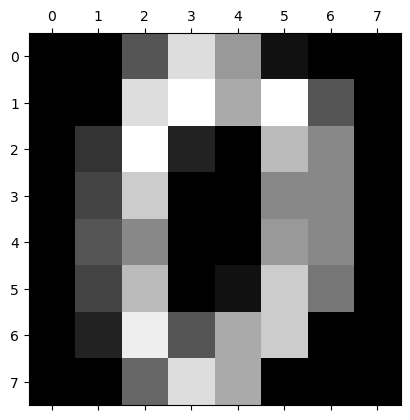

In [27]:

plt.gray()
plt.matshow(digits_reconstructed[0].reshape((8,8)))

plt.matshow(digits.images[0])

plt.show()

Kernel PCA

In [50]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

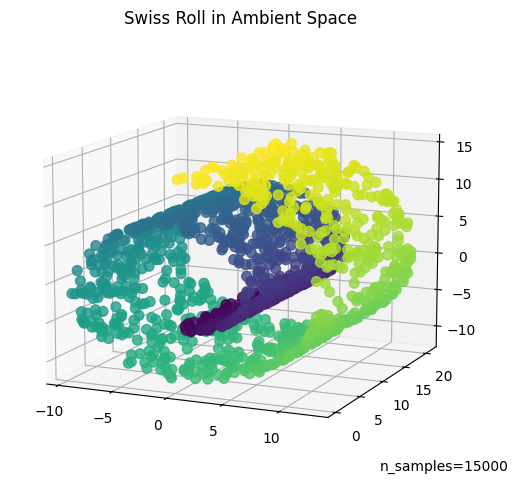

In [51]:
fig = plt.figure(figsize=(8, 6))
plt.set_cmap('viridis')
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=15000", transform=ax.transAxes)

In [52]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    gamma=0.1
)

In [53]:
sr_points_2d = kpca.fit_transform(sr_points)

Text(0.5, 1.0, 'Swiss Roll in 2d')

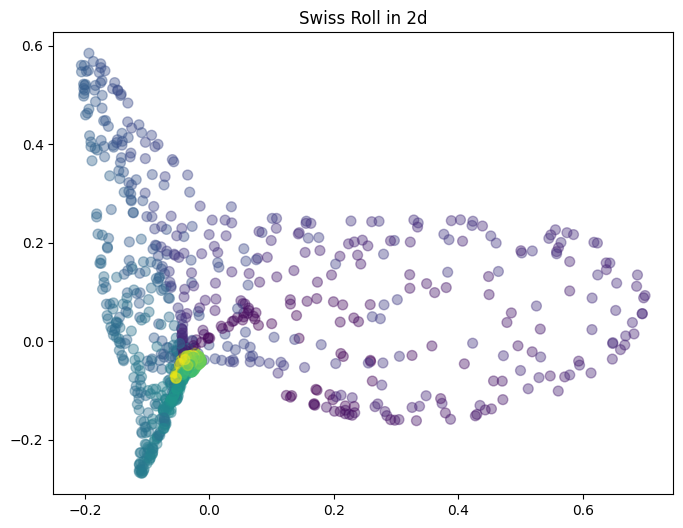

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.add_axes(ax)
ax.scatter(
    sr_points_2d[:, 0], sr_points_2d[:, 1], c=sr_color, s=50, alpha=0.4
)
ax.set_title("Swiss Roll in 2d")

Random Projection

In [59]:

from sklearn import random_projection
rand_proj = random_projection.GaussianRandomProjection(
    n_components=10,
    compute_inverse_components=True
)
digits_random_projection = rand_proj.fit_transform(digits.data)

<Figure size 640x480 with 0 Axes>

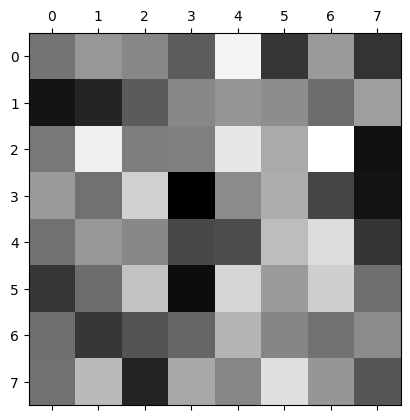

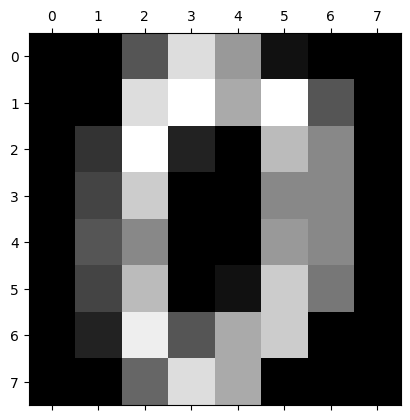

In [60]:
digits_random_reconstruction = rand_proj.inverse_transform(digits_random_projection)
plt.gray()
plt.matshow(digits_random_reconstruction[0].reshape((8,8)))

plt.matshow(digits.images[0])

plt.show()

Jetzt vollen MNIST Datensatz

In [ ]:
import gzip
with gzip.open('../Data/train-images-idx3-ubyte.gz', 'rb') as f:
    mnist= np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

In [ ]:
mnist.shape

(60000, 784)

In [ ]:
rand_proj = random_projection.GaussianRandomProjection(
    n_components=300,
    compute_inverse_components=True
)
full_mnist_random_projection = rand_proj.fit_transform(mnist)

<Figure size 640x480 with 0 Axes>

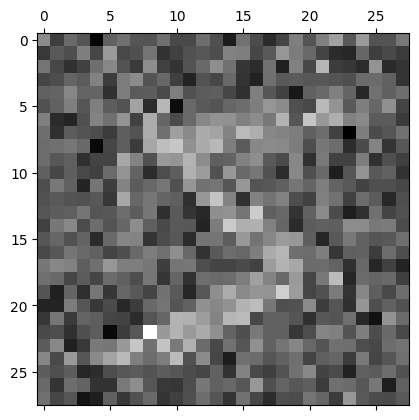

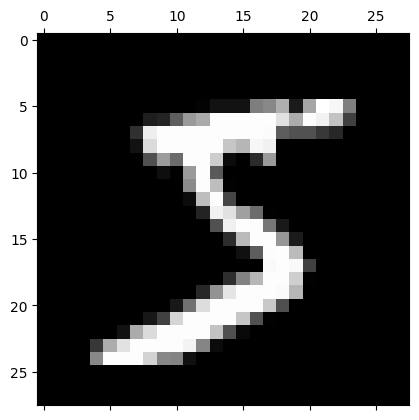

In [ ]:
full_mnist_random_reconstruction = rand_proj.inverse_transform(full_mnist_random_projection)
plt.gray()
plt.matshow(full_mnist_random_reconstruction[0].reshape((28,28)))

plt.matshow(mnist[0].reshape(28,28))

plt.show()

Isomap

In [63]:
from sklearn.manifold import Isomap

In [73]:
embedding = Isomap(
    n_components=2,
    n_neighbors=10
)

In [74]:
isomap_output = embedding.fit_transform(sr_points)

Text(0.5, 1.0, 'Swiss Roll with isomap')

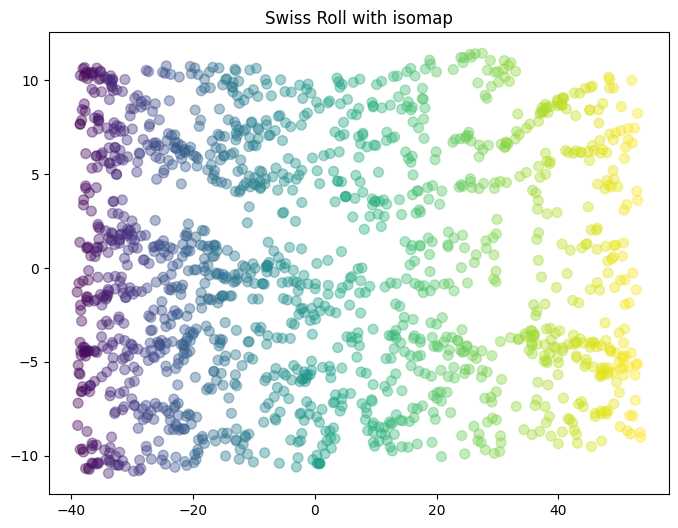

In [75]:
fig = plt.figure(figsize=(8, 6))
plt.set_cmap('viridis')
ax = fig.add_subplot(111)
fig.add_axes(ax)
ax.scatter(
    isomap_output[:, 0], isomap_output[:, 1], c=sr_color, s=50, alpha=0.4
)
ax.set_title("Swiss Roll with isomap")

T-SNE

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    random_state=0,
    perplexity=30
)

In [38]:
digits_tsne = tsne.fit_transform(
    digits.data[:500]
)

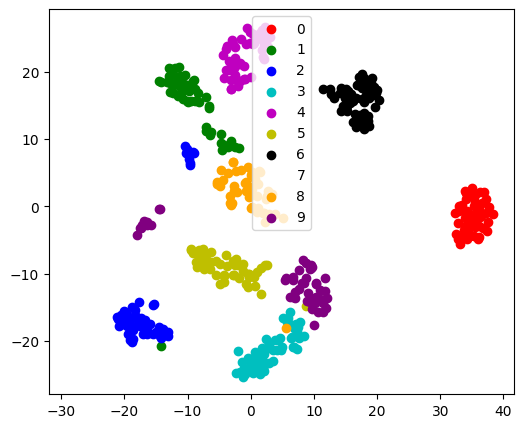

In [ ]:
from matplotlib import pyplot as plt


target_ids = range(len(digits.target_names))
y = digits.target[:500]
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(digits_tsne[y == i, 0], digits_tsne[y == i, 1], c=c, label=label)
plt.legend()
plt.show()